In [1]:
import numpy as np
from PyQt4.QtGui import *
from Qrender1 import *
from pathfile import *
from pyfield import *

    


if __name__ == '__main__':

    
    #n = 100 
    #idx = np.arange(0,n)/float(n-1)
    
    #X = np.zeros((n,3))
    #X[:,0] = np.cos(np.pi*idx)*0.4+0.5
    #X[:,1] = np.sin(np.pi*idx)*0.2+0.5
    
    #I = np.arange(0,n)/float(n-1)*0.7+0.3
    #D = np.arange(0,n)/float(n-1)*0.0025+0.001
    
    dim = (64,64)
    idx = np.indices(dim)
    data = (np.exp(-((idx[0]-23.5)**2.+(idx[1]-31.5)**2.)/2/4) - np.exp(-((idx[0]-39.5)**2.+(idx[1]-31.5)**2.)/2/4))
    
    nz = 64
    field = Field(data, nz)
    
    nx = int(1e4)
    #x = np.ones((3,nx))*2
    x = np.random.random((3,nx))*60+1.5
    #x[2,:] = np.zeros(nx)+2
    flines = field.Fline(x, step = 0.5)
    
    X = []
    I = []
    D = []
    for i in range(0,nx):
        if (flines[i][0][2,0] < 0.5) and (flines[i][0][2,-1] < 0.5):
        
            n = flines[i][0].shape[1]
            X = X + [flines[i][0].T/64]
            I = I + [np.ones(n)]
            D = D + [flines[i][1][n/2]/flines[i][1]*0.01]

    app = QApplication(sys.argv)
    widget = myWidget(X, I, D)
    widget.show()
    app.exec_()


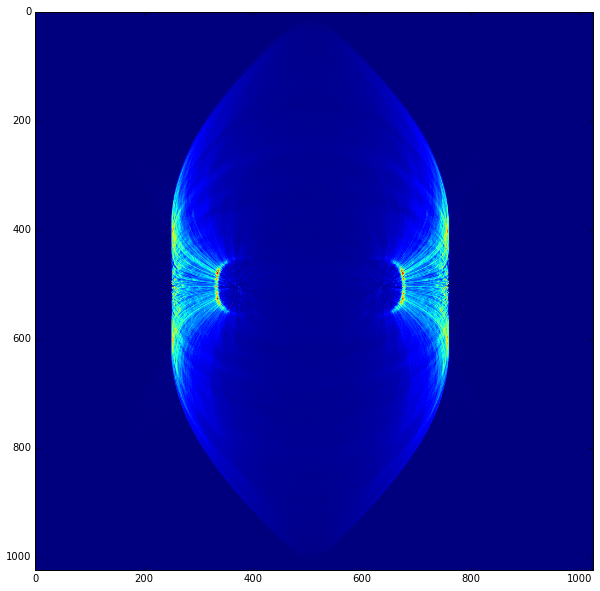

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
plt.imshow(widget.widget.scrnData)
#fig.savefig('q.png')

In [ ]:
import numpy as np
from PyQt4.QtGui import *
from Qrender1 import *
from pathfile import *
from pyfield import *


if __name__ == '__main__':
    #N = 10
    #R = np.random.random((N,3))
    #I = np.random.random(N)   
    
    
    dim = (64,64)
    idx = np.indices(dim)
    data = (np.exp(-((idx[0]-28)**2.+(idx[1]-32)**2.)/2/9) - np.exp(-((idx[0]-36)**2.+(idx[1]-32)**2.)/2/9))
    
    nz = 64
    field = Field(data, nz)
    
    nx = int(1e3)
    #x = np.ones((3,nx))*2
    x = np.random.random((3,nx))*63
    x[2,:] = np.ones(nx)*2
    flines = field.Fline(x, step = 0.5)
    
    R = np.concatenate(flines, axis=1).T/64.
    NR = R.shape[0]
    I = []
    for i in range(0,nx):
        n = flines[i].shape[1]
        I = I + [np.ones(n)*np.float(np.random.random() > 0.95)]
    I = np.concatenate(I)

    #N = 10000
    #idx = np.floor(np.random.random(N)*NR).astype(np.int)

    #R = R[idx,:]
    #I = I[idx]
    
    #app = QApplication(sys.argv)
    #widget = myWidget(R, I)
    #widget.show()
    #app.exec_()


In [ ]:
import numpy as np
nx = int(1e6)
    
s = np.array((1,0,0))
R = np.random.normal(0.5,0.1,(nx,3))
    
d = R - np.dot(np.dot(R,s).reshape((nx,1)),s.reshape(1,3))

In [ ]:
R.shape

In [ ]:
x = 0 if False else 1
print x